## 🧠 Anomaly Detection

##  1. What is Anomaly Detection?
Anomaly Detection is the process of identifying data points that are different or unusual compared to the majority of the data.

Think of:

Fraudulent credit card transactions 💳

Sudden spikes in network traffic 🌐

Faulty sensors in machines 🛠️

Abnormal blood pressure in patients 🏥

## 2. Why is it Useful?
Anomalies are rare but important. Detecting them early can:

Prevent fraud

Save costs (detect defects early)

Improve safety (machine or health failures)

In [3]:
# Supervised vs Unsupervised Learning in Anomaly Detection

| Type             | Description                                            | When to Use                                                  |
| ---------------- | ------------------------------------------------------ | ------------------------------------------------------------ |
| **Supervised**   | We **know** which data points are normal vs. anomalous | If labeled data is available (e.g. fraud: Yes/No)            |
| **Unsupervised** | We **don’t know** which are outliers                   | Most common in real life — when labels are **not available** |


Supervised Anomaly Detection — With Labels

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Simulate labeled dataset
import numpy as np
np.random.seed(0)
X_normal = np.random.normal(0, 1, (1000, 2))
X_anomaly = np.random.normal(5, 1, (50, 2))
X = np.vstack((X_normal, X_anomaly))
y = np.array([0]*1000 + [1]*50)  # 0 = normal, 1 = anomaly

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# Fit supervised model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00        10

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



✅ Best when you have labels
❌ But often, labels aren't available for anomalies.

Unsupervised Anomaly Detection — Without Labels

## (A) LOF - Local Outlier Factor

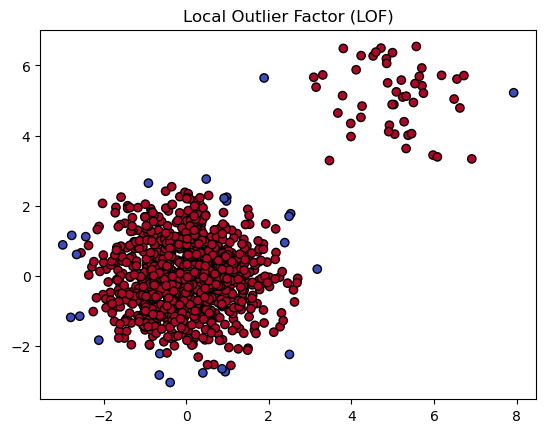

In [7]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

lof = LocalOutlierFactor(n_neighbors=20)
y_pred = lof.fit_predict(X)  # 1 = inlier, -1 = outlier

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("Local Outlier Factor (LOF)")
plt.show()


##  (B) Isolation Forest

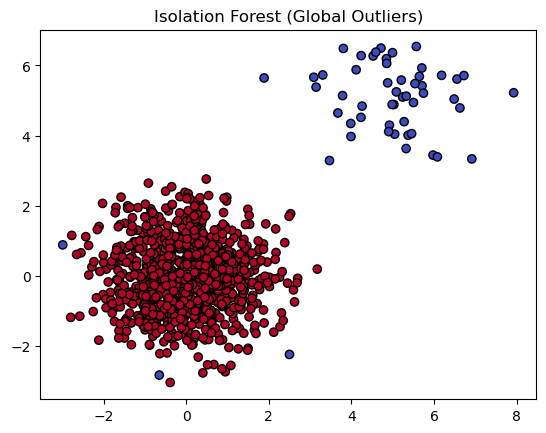

In [9]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05)
y_pred = clf.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("Isolation Forest (Global Outliers)")
plt.show()


## (C) One-Class SVM

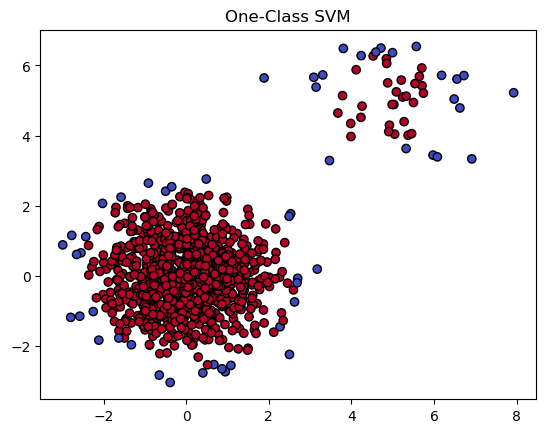

In [10]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.1)
svm.fit(X)
y_pred = svm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("One-Class SVM")
plt.show()


## When to Use Which?

| Method                         | Best for                | Data Needed |
| ------------------------------ | ----------------------- | ----------- |
| Supervised (e.g. RandomForest) | If labels are available | Labeled     |
| LOF                            | Local/dense anomalies   | Unlabeled   |
| Isolation Forest               | Global outliers         | Unlabeled   |
| One-Class SVM                  | Global boundary         | Unlabeled   |
| Z-Score                        | Simple numeric outliers | Unlabeled   |


# Techniques and Algorithms

| Algorithm            | Description                              | Suitable for                      |
| -------------------- | ---------------------------------------- | --------------------------------- |
| **Z-Score / IQR**    | Statistical methods                      | Simple numeric data               |
| **K-Means**          | Distance from cluster centroids          | Structured data                   |
| **DBSCAN**           | Density-based clustering                 | Spatial anomalies                 |
| **Isolation Forest** | Random partitioning to isolate anomalies | High-dimensional data             |
| **Autoencoders**     | Neural networks that reconstruct input   | Complex and high-dimensional data |
| **One-Class SVM**    | Learns boundary of normal class          | Semi-supervised problems          |


| Situation             | Try This                        |
| --------------------- | ------------------------------- |
| No labels             | Isolation Forest, LOF           |
| Time series           | Prophet, ARIMA, LSTM-AE         |
| Images                | CNN Autoencoders                |
| Structured table data | Isolation Forest, One-Class SVM |
| High-dimensional data | PCA, Autoencoders               |


# GOAL

| Aspect           | Detail                                               |
| ---------------- | ---------------------------------------------------- |
| **Goal**         | Identify data that deviates from the norm            |
| **Techniques**   | Statistical, Clustering, ML, Deep Learning           |
| **Types**        | Point, Contextual, Collective                        |
| **Applications** | Fraud, Health, Security, Maintenance                 |
| **Challenges**   | Imbalanced data, evolving patterns, interpretability |


| Style                 | How it works (Easy Version)                                      |
| --------------------- | ---------------------------------------------------------------- |
| 🧪 **Statistical**    | "If the value is too far from average, it’s suspicious"          |
| 📏 **Distance-based** | "If it’s far from other data points, it’s an outlier"            |
| 🧭 **Density-based**  | "If it’s in a lonely area, it's weird"                           |
| 🌳 **Tree-based**     | "If we can isolate it quickly in decision trees, it’s rare"      |
| 🔵 **Clustering**     | "If it doesn’t fit any group (cluster), maybe it doesn’t belong" |
| ✅ **Classification**  | "Learn what’s normal and find anything that isn’t like it"       |
| 🔧 **Reconstruction** | "If a model can’t rebuild it accurately, it’s strange"           |
| ⏱️ **Time-series**    | "If a time pattern suddenly breaks, it’s an anomaly"             |
